In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("./data/ex1data2.txt", header=None)
df.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [19]:
df.columns = (['Size', 'Bedroom', 'Price'])
df.head()

,Size,Bedroom,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


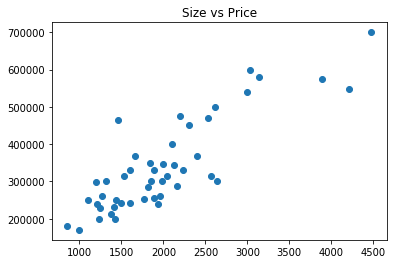

In [21]:
plt.scatter(df.Size, df.Price)
plt.title("Size vs Price")
plt.show()

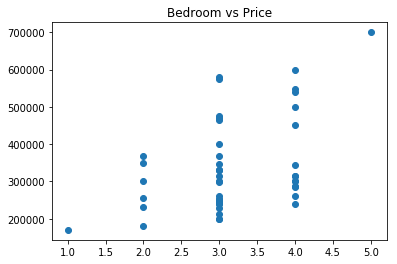

In [23]:
plt.scatter(df.Bedroom, df.Price)
plt.title("Bedroom vs Price")
plt.show()

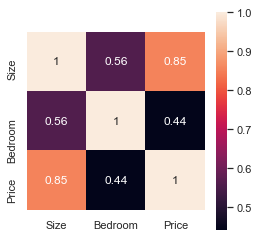

In [26]:
# Correlation between the features
plt.subplots(figsize=(4, 4))
sns.set(font_scale=1)
sns.heatmap(df.corr(), square= True, cbar= True, annot= True)
plt.show()

In [27]:
df.drop('Bedroom', axis=1, inplace=True)

In [31]:
m = len(df)
X = np.array(df['Size']).reshape((m,1))
y = np.array(df['Price']).reshape((m,1))

(47, 1)


Text(0.5,1,'Distribution of Price')

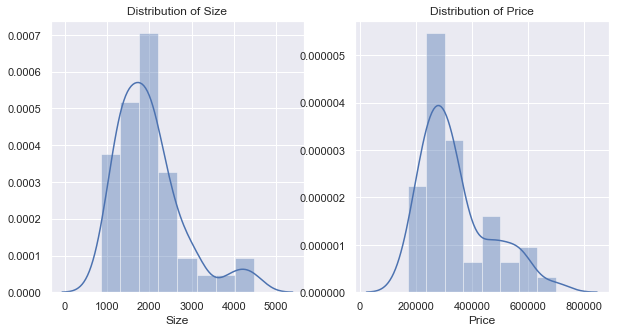

In [108]:
f,ax = plt.subplots(1,2, figsize=(10,5))
sns.distplot(df['Size'], ax= ax[0])
ax[0].set_title('Distribution of Size')
sns.distplot(df['Price'], ax= ax[1])
ax[1].set_title('Distribution of Price')


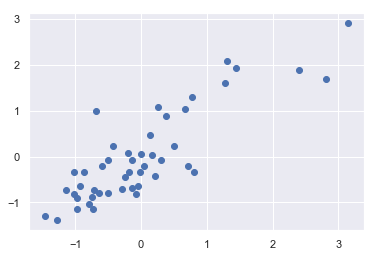

In [118]:
def normalize_data(Z, normal=False, scale='max'):
    Zn = np.zeros(Z.shape)
    for col in range(Zn.shape[1]):
        std = Z[:, col].std()
        clm = Z[:, col]
        mn = Z[:, col].mean()
        mx = Z[:,col].max()
        nrm = 0 
        sclr = 1
        if normal:
            nrm = mn
        if scale == 'max':
            sclr = mx
        elif scale == 'std':
            sclr = std
            
        Zn[:,col] = (clm-nrm)/sclr
    return Zn

Xn = normalize_data(X, normal=True, scale = 'std')
yn = normalize_data(y, normal=True, scale = 'std')

plt.scatter(Xn, yn)
plt.show()

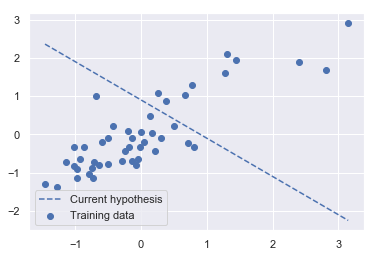

In [119]:
theta = np.array([0.9, -1])
lineX = np.linspace(Xn.min(), Xn.max(), 100)
liney = [theta[0] + theta[1] * x for x in lineX]
plt.scatter(Xn, yn, label = 'Training data')
plt.plot(lineX, liney, 'b--', label = 'Current hypothesis')
plt.legend()
plt.show()


In [120]:
def cost_function(X,y,theta, deriv=False):
    z = np.ones((len(X),1))
    X = np.append(z, X, axis=1)
    
    if (deriv):
        loss = X.dot(theta) - y
        gradient = X.T.dot(loss)/len(X)
        return gradient, loss
    else:
        h = X.dot(theta)
        j = (h-y.flatten())
        J = j.dot(j)/2/(len(X))
        return J
cost_function(Xn, yn, theta)

2.259987592878125

In [121]:
def gradient_descent(features, target, param, learning_rate=0.01, multiple=1, batch=len(X), log=False):
    iterations = batch * len(features)
    epochs = iterations * multiple
    y = target.flatten()
    
    thetas = np.zeros((param.shape[0], epochs)).T
    costs = [0]* epochs
    
    for ix in range(epochs):
        i = epochs%len(X)
        cost = cost_function(features[i:i+batch], y[i: i+batch], param)
        costs[ix] = cost
        thetas[ix] = param
        
        g, l = cost_function(features[i:i+batch], y[i:i+batch], param, deriv=True)
        param = param - learning_rate * g
        
        if log:
            if ix%250 == 0:
                print("iteration :", ix+1)
                print("\tgradient = ", g)
                print("\trate     = ", learning_rate*g)
                print("\ttheta    = ", params)
                print("\tcost     = ", cost)
                
    return costs, thetas
        
alpha = 0.7
mul = 10
bat = 8
costs , thetas = gradient_descent(Xn, yn, theta, alpha, mul, bat, log=False)

        

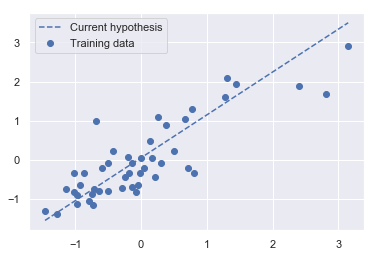

In [122]:
lineX = np.linspace(Xn.min(), Xn.max(), 100)
liney = [thetas[-1,0] + thetas[-1,1] * x for x in lineX]

plt.scatter(Xn, yn, label = 'Training data')
plt.plot(lineX, liney, 'b--', label = 'Current hypothesis')
plt.legend()
plt.show()


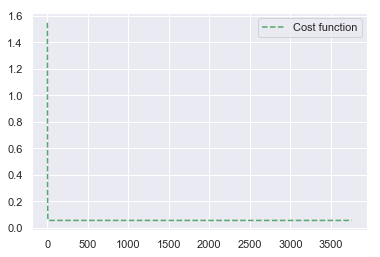

In [123]:
plt.plot(costs, 'g--', label = 'Cost function')
plt.legend()
plt.show()

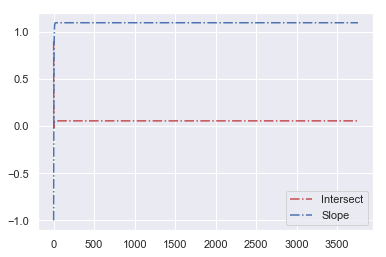

In [124]:
plt.plot(thetas[:,0], 'r-.', label = 'Intersect')
plt.plot(thetas[:,1], 'b-.', label = 'Slope')
plt.legend()
plt.show()

In [125]:
intersect = np.linspace(-2, 2, 100)
slope = np.linspace(-2, 3, 100)

J_vals = np.zeros((intersect.size, slope.size))

for t1, element in enumerate(intersect):
    for t2, element2 in enumerate(slope):
        thetaT = np.zeros(shape=(2,1))
        thetaT[0][0]= element
        thetaT[1][0]= element2
        J_vals[t1,t2] = cost_function(Xn, yn, thetaT.flatten())

J_vals = J_vals.T


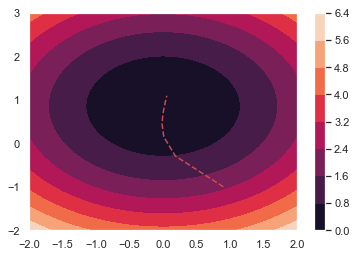

In [126]:
A, B = np.meshgrid(intersect, slope)
C= J_vals

cp = plt.contourf(A, B, C)
plt.colorbar(cp)
plt.plot(thetas.T[0], thetas.T[1], 'r--')
plt.show()